In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from read import read_sims_result
import matplotlib

import matplotlib.pyplot as plt
# import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

In [2]:
df = read_sims_result(
    '/Users/xcheng/Documents/Oberlin/Summer2/DataAnalysis/data/0614/1IR', 32)
# k = df.loc[31*2:31*2+30, "dot1":"dot31"].values
# print(k)
# G = nx.DiGraph(df.loc[31*2:31*2+30, "dot1":"dot31"].values)
# G.edges(data=True)
# nx.draw(G)

In [3]:
def update_edge_matrix(g, ndarray):
    for i in range(len(ndarray)):
        for j in range(len(ndarray)):
            g.add_edge(i, j, weight=ndarray[i][j])

In [4]:
# G = nx.DiGraph()
# ma = df.loc[31*2:31*2+30, "dot1":"dot31"].values
# update_edge_matrix(G, ma)
# pos=nx.spring_layout(G) 
# positive_edges = [(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >0]
# a = nx.draw_networkx_nodes(G,pos)
# b = nx.draw_networkx_edges(G,pos,edgelist=positive_edges,arrows=False)
# print(type(a),type(b))
# plt.axis('off')
# plt.show()

In [5]:
# PG = nx.DiGraph()
# nx.draw(PG)

In [6]:
# PG.add_edge("a","b",weight=1)
# PG.add_edge("b","c",weight=0)
# PG.remove_edge("p","q")
# nx.draw(PG)

In [7]:
# for i in range(15):
#     G = nx.DiGraph(df.loc[31*i:31*i+30, "dot1":"dot31"].values)
#     nx.draw(G)

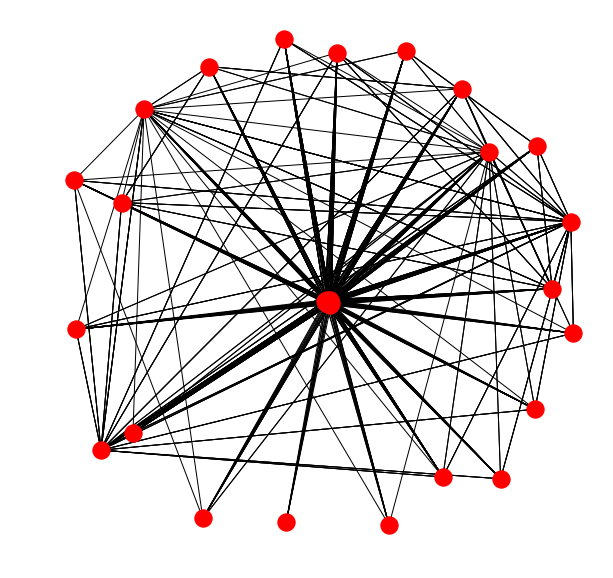

In [34]:
G = nx.DiGraph()
update_edge_matrix(G, df.loc[31:31+30, "dot1":"dot31"].values)

fig = plt.figure(figsize=(10,10))
pos=nx.spring_layout(G) 

positive_edges = [(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >0]
nodes = nx.draw_networkx_nodes(G,pos)
edges = nx.draw_networkx_edges(G, pos, arrows=False,edgelist=positive_edges) 
plt.axis('off')

def update(i):
    update_edge_matrix(G, df.loc[i*31:i*31+30, "dot1":"dot31"].values)
    positive_edges = [[u,v] for (u,v,d) in G.edges(data=True) if d['weight'] >0]
#     print(positive_edges)
    edges = nx.draw_networkx_edges(G, pos, arrows=False,edgelist=positive_edges) 
#     print(edges.get_array())
    return edges,

anim = FuncAnimation(fig, update, frames=range(2,5), interval=500, blit=True)
anim.save("network.mp4")

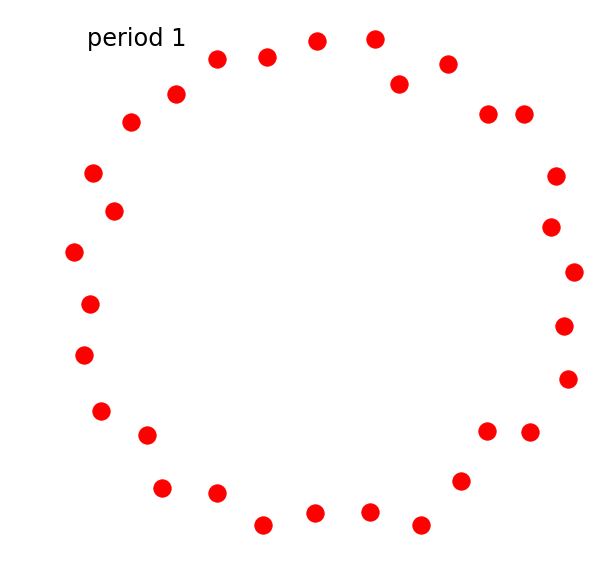

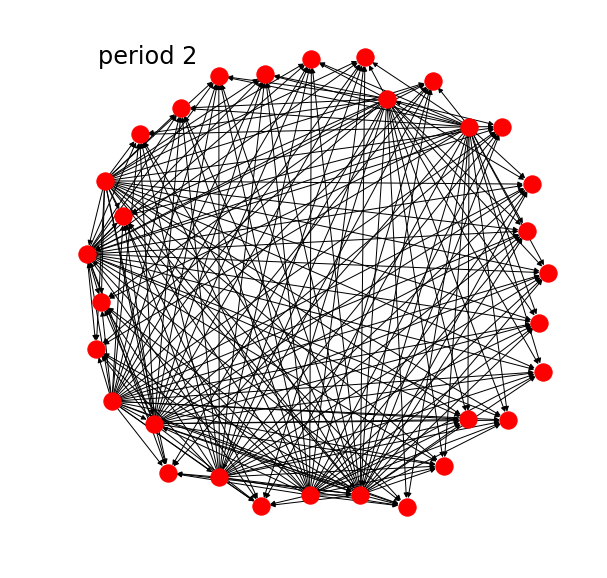

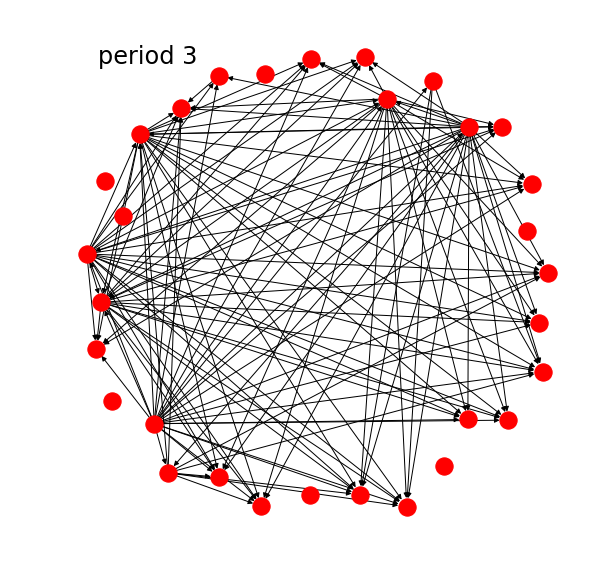

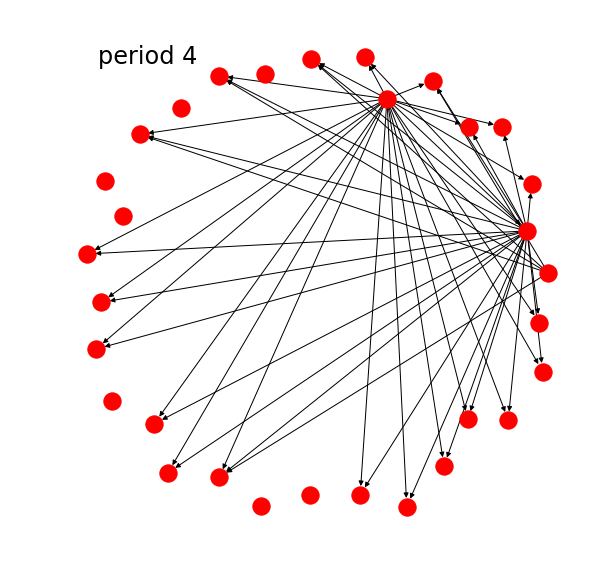

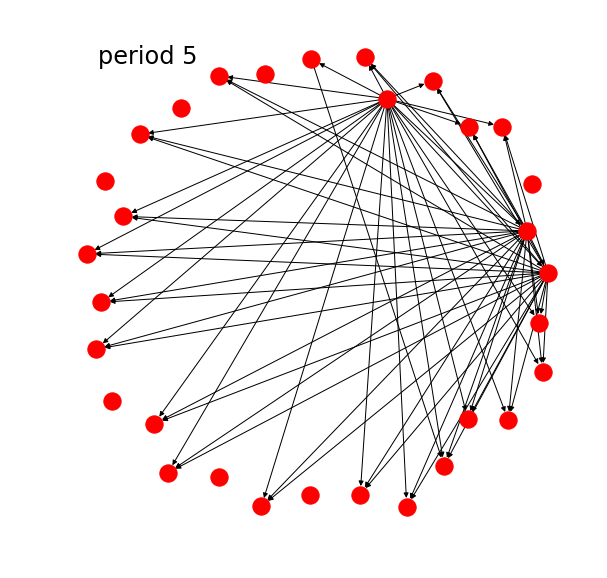

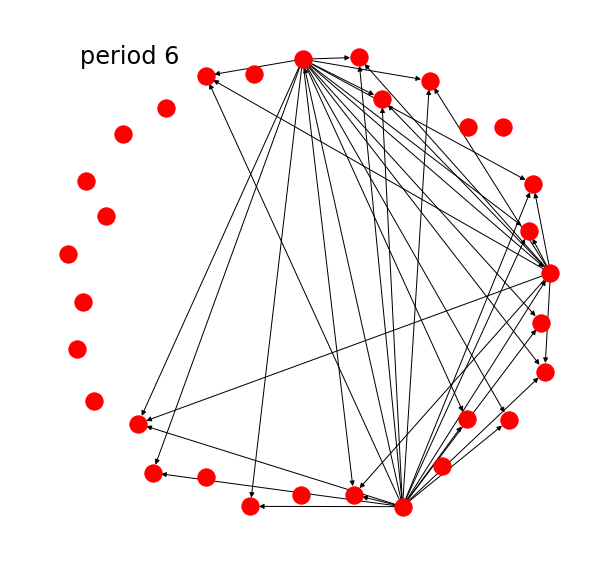

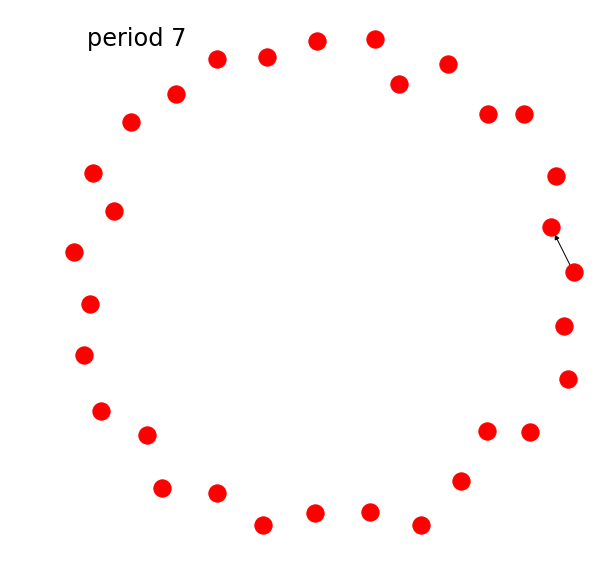

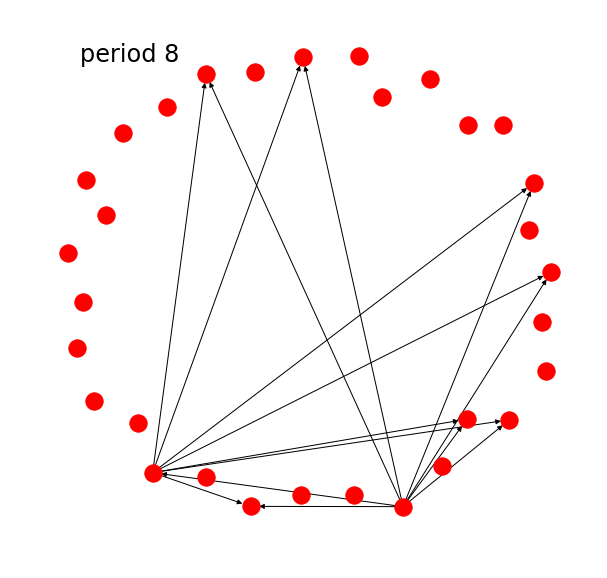

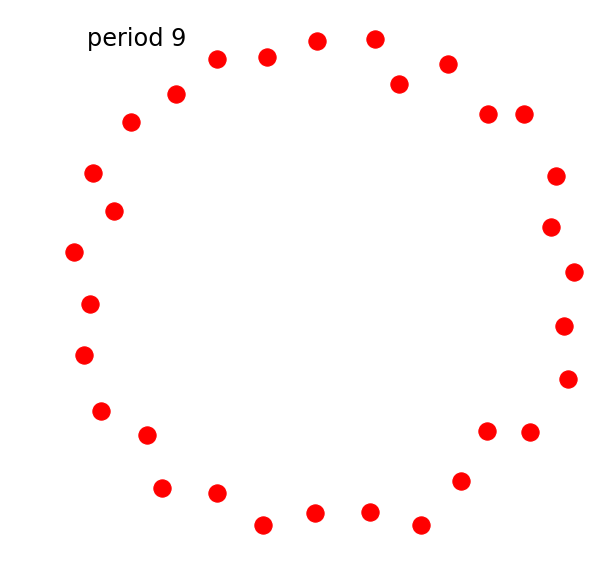

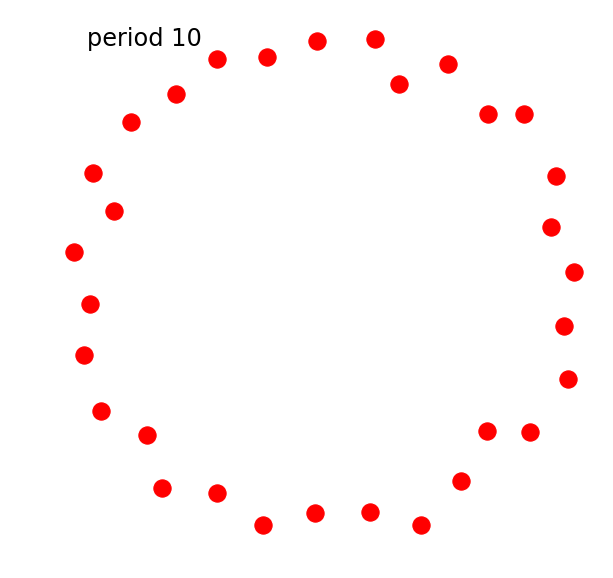

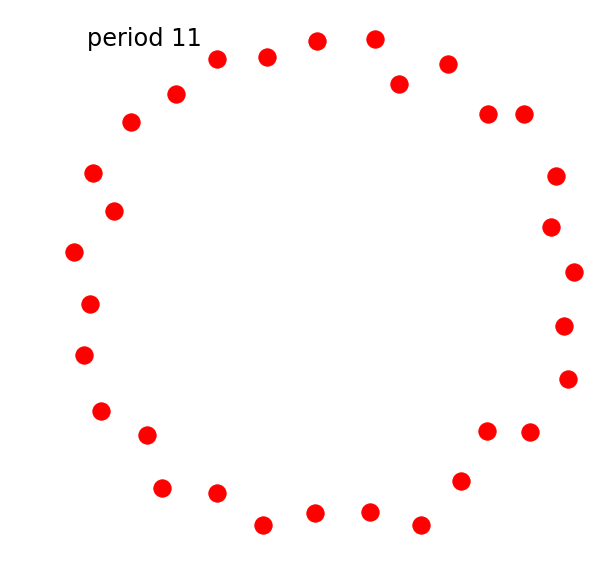

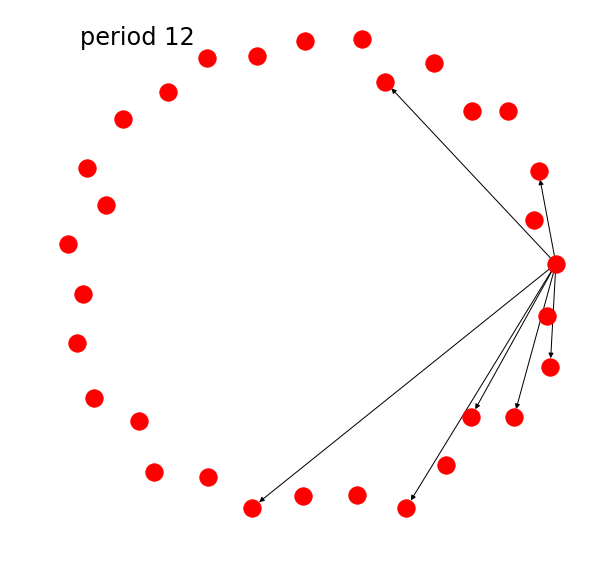

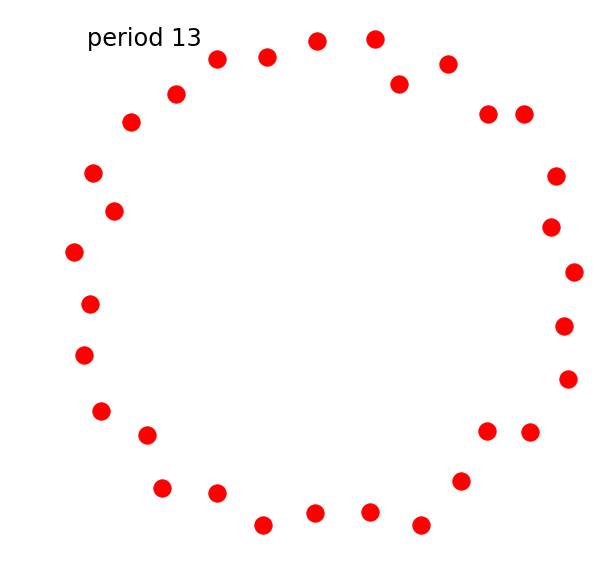

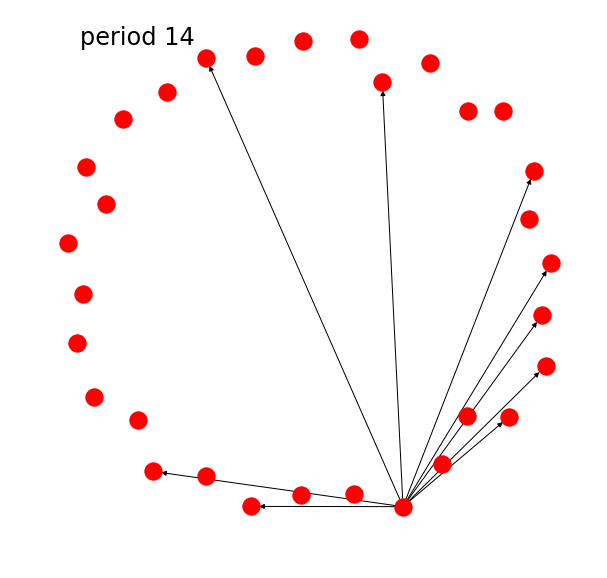

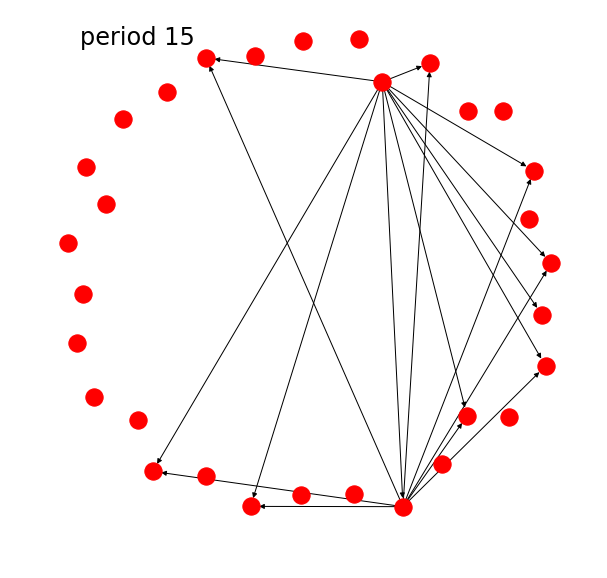

In [60]:
G = nx.DiGraph()
update_edge_matrix(G, df.loc[0:30, "dot1":"dot31"].values)
pos=nx.spring_layout(G) 
for i in range(15):
    update_edge_matrix(G, df.loc[0:30, "dot1":"dot31"].values)

    fig = plt.figure(figsize=(10,10))
    plt.axis('off')
    nx.draw_networkx_nodes(G,pos)
    
    update_edge_matrix(G, df.loc[i*31:i*31+30, "dot1":"dot31"].values)
    positive_edges = [(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >0]
    nx.draw_networkx_edges(G, pos, arrows=True, edgelist=positive_edges) 
    plt.text(-0.95,0.95,s="period "+str(i+1),fontsize=24)
    plt.savefig("zzp-fig"+str(i)+".png")

# def update(i):
#     update_edge_matrix(G, df.loc[i*31:i*31+30, "dot1":"dot31"].values)
#     positive_edges = [[u,v] for (u,v,d) in G.edges(data=True) if d['weight'] >0]
#     edges = nx.draw_networkx_edges(G, pos, arrows=False,edgelist=positive_edges) 
#     return edges,

# anim = FuncAnimation(fig, update, frames=range(2,5), interval=500, blit=True)
# anim.save("network.mp4")